<!--Header-->
<div id="header" class="fluid-row" style="max-width: 910px; margin-left: auto; margin-right: auto">
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.campus.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Estudios de InformÃ¡tica, Multimedia y Telecomunicaciones</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div style="text-align:center;"> </div>
        </div>
    </div>
</div>
<!--/Header-->



## Objetivos
Trabajaremos la generación, interpretación y evaluación de un modelo de agregación y de un modelo donde generaremos reglas de asociación con el software de practicas. No perderemos de vista las fases de preparación de los datos, calidad del modelo y extracción inicial del conocimiento.

Realizaré los pasos del ciclo de vida de un proyecto de minería de datos para el caso de un algoritmo de agregación. Lo haréis con el fichero *clientes.csv* que encontraréis adjunto.

In [1]:
#Imoprto todas las librerias que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set()

In [2]:
#Descargo el dataset
data = pd.read_csv("clientes.csv")

#Cantidad de filas y columnas
print('El dataset contiene', data.shape[0], ' filas y', data.shape[1],' columnas')

#Columas
print('\nLas columnas del data set son:\n ',data.columns)

#Tipos de variables
print('\nTipo de variable de cada columna:\n',data.dtypes)

#Imprimo las primeras 10 filas del dataset
data.head(10)

El dataset contiene 200  filas y 5  columnas

Las columnas del data set son:
  Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

Tipo de variable de cada columna:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#Analizo si hay valores nulos
print('\n\nInformacion del Dataset:\n ',data.info())
print('\nCantidad de valores faltantes por columna:\n',data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Informacion del Dataset:
  None

Cantidad de valores faltantes por columna:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


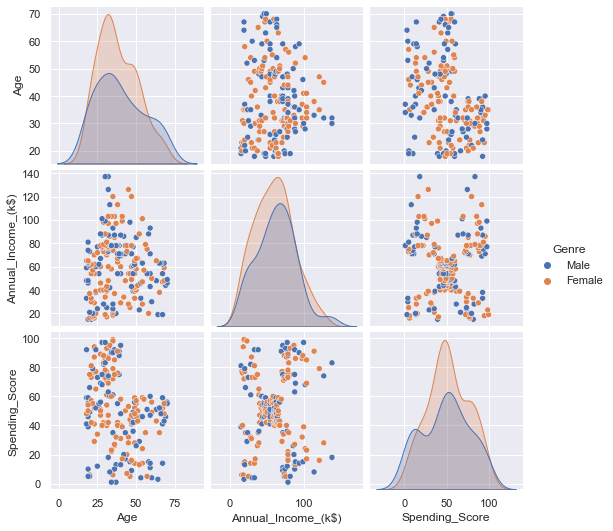

In [4]:
#Realizo un pairplot eliminando la variable Customer ID ya que no entrega informacion relevante
data = data.drop(['CustomerID'], axis = 1)
sns.pairplot(data, hue = 'Genre')
plt.show()

Viendo los gráficos entre los pares de variables, podemos identificar la formacion de grupos cuando observamos la variable Spending_Score vs Annual_Income. 

In [5]:
#Binarizo la variable Genre para poder incluirla en el modelo de agregación
data.Genre = data.Genre.map({'Female': 1, 'Male': 0})
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Como inicialmente no conozco el número óptimo de clústers, pruebo con varios valores.
Para la selección del número de clústers lo haré primero en base a la inspección de la gráfica que se obtiene al iterar con el mismo  conjunto de datos para distintos valores del número de clústers, obteniendo en cada  iteración la suma de las distancias al cuadrado de todas las muestras a su centroide de cluster mas cercano, este valor lo obtengo con el método inertia_ del modelo Kmeans. 
Finalmente, seleccionaré el valor de clusters que se encuentra en el "codo" de la curva. 

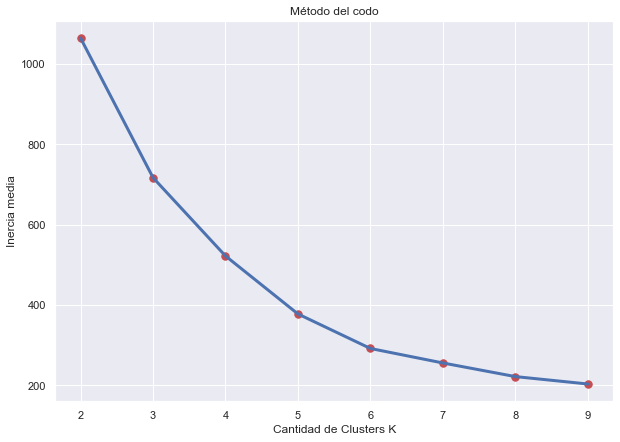

In [6]:
#Lista donde voy a ir agregando las distancias medias
lista_distancias_medias = []
# Entreno un modelo para cada numero de cluster que quiero probar
K = np.arange(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    #Inertia me da la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Calculo la distancia media y la agrego a la lista
    distancia_media = distancia_total/len(data)
    lista_distancias_medias.append(distancia_media)

#Grafico 
plt.figure(figsize = (10,7))
plt.plot(K,lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')
plt.show()

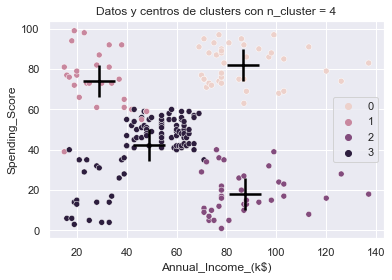

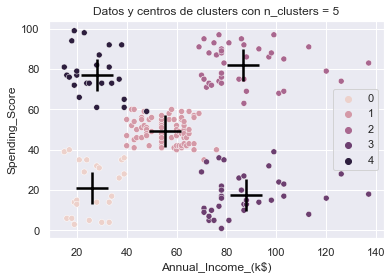

In [7]:
# Teniendo en cuenta el grafico anterior, tengo que buscar el valor que cree un "codo" en el grafico, el cual 
# podria ser 4 o 5.

#Pruebo con el valor 4 
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas4_ = kmeans.labels_
centros_ = kmeans.cluster_centers_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], hue = etiquetas4_)
sns.scatterplot(x = centros_[:, 2],y = centros_[:, 3],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_cluster = 4')
plt.show()

#Pruebo con el valor 5
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas5_ = kmeans.labels_
centros_ = kmeans.cluster_centers_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], hue = etiquetas5_)
sns.scatterplot(x = centros_[:, 2],y = centros_[:, 3],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 5')
plt.show()

Observando los graficos que se obtienen con 4 o 5 clusters, el valor a seleccionar seria 5 ya que los grupos quedan mejor separados entre si, con los centros bien definidos.

Ahora realizo el mismo analisis pero con otra métrica: Silhouette Coefficient.
El coeficiente Silhouette para una muestra es (b - a) / max(a, b), siendo "a" la distancia entre la muestra y todos los puntos de su cluster, y b la distancia entre la muestra y el cluster mas cercano.  por lo tanto, lo ideal es que a sea lo menor posible, ya que quiero que los puntos de un cluster sean lo mas parecidos posibles, y que b sea lo mayor posible, ya que quiero que los puntos de distintos clusters sean lo mas diferentes posible.
Entonces el coeficiente va a ser ideal cuando sea igual a 1, si da negativo el punto esta mal clasificado. 
Seleccionaré el valor de clusters que hacen que el coeficiente sea lo mas cercano a uno posible.

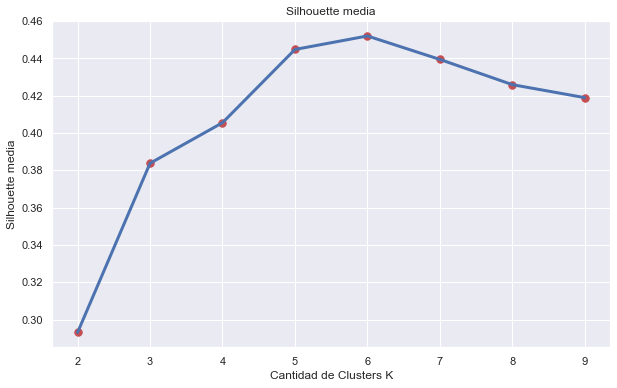

In [8]:
#Armo una lista donde voy a ir agregando los valores medios de silhouette
lista_sil = []
K = np.arange(2,10)

for k in K:
    km2 = KMeans(n_clusters=k)
    km2 = km2.fit(data)
    
    # Tomamos las etiquetas
    etiquetas = km2.labels_
    
    # Calculamos el coeficiente silhouette 
    valor_medio_sil = silhouette_score(data, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,6))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media')
plt.show()

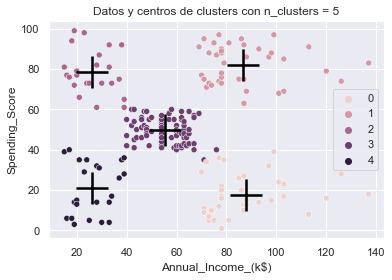

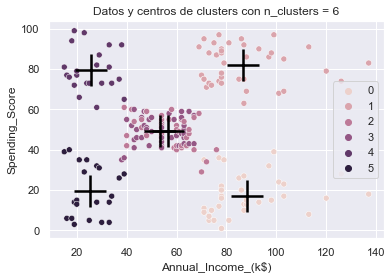

In [9]:
#Teniendo en cuenta el grafico, el numero de cluster que hace que el coeficiente sea lo mas cercano a uno es 
#5 o 6.

#Pruebo con el valor 5 (seria igual que el caso anterior)
kmeans2 = KMeans(n_clusters=5)
kmeans2 = kmeans2.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas5_ = kmeans2.labels_
centros_ = kmeans2.cluster_centers_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], hue = etiquetas5_)
sns.scatterplot(x = centros_[:, 2],y = centros_[:, 3],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 5')
plt.show()


#Pruebo con 6
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas6_ = kmeans.labels_
centros_ = kmeans.cluster_centers_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], hue = etiquetas6_)
sns.scatterplot(x = centros_[:, 2],y = centros_[:, 3],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 6')
plt.show()

En este caso, tambien se observa mejor separacion de los grupo con 5 clusters que con 6. 

Para poder graficar todos los pares de variables con la funcion pairplot diferenciando el cluster al que fue asignado cada punto, creo una nueva columna en el dataset correspondiente al número de cluster que le tocó a cada dato. 

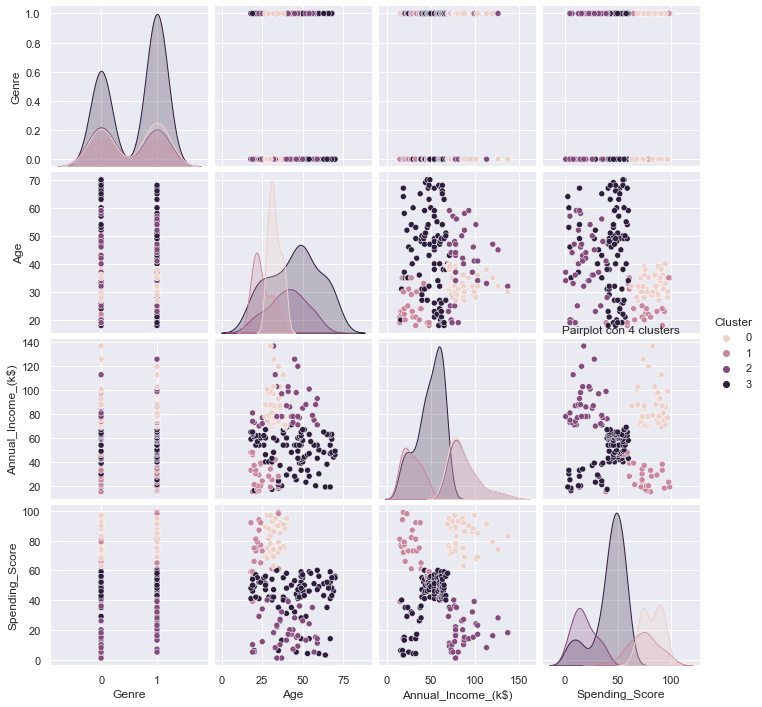

Datos Cluster 0
Valor de edad promedio: 32.69230769230769
Valor de ingreso anual promedio: 86.53846153846153
Valor de gasto promedio: 82.12820512820512
Cantidad de hombres: 18
Cantidad de mujeres: 21

Datos Cluster 1
Valor de edad promedio: 24.821428571428573
Valor de ingreso anual promedio: 28.714285714285715
Valor de gasto promedio: 74.25
Cantidad de hombres: 14
Cantidad de mujeres: 14

Datos Cluster 2
Valor de edad promedio: 40.32432432432432
Valor de ingreso anual promedio: 87.43243243243244
Valor de gasto promedio: 18.18918918918919
Cantidad de hombres: 19
Cantidad de mujeres: 18

Datos Cluster 3
Valor de edad promedio: 44.875
Valor de ingreso anual promedio: 48.9375
Valor de gasto promedio: 42.552083333333336
Cantidad de hombres: 37
Cantidad de mujeres: 59


In [11]:
#Con 4 clusters
data['Cluster'] = etiquetas4_
sns.pairplot(data, hue = 'Cluster')
plt.title('Pairplot con 4 clusters')
plt.show()

print('Datos Cluster 0')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 0].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 0].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 0].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 0) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 0) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 1')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 1].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 1].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 1].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 1) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 1) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 2')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 2].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 2].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 2].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 2) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 2) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 3')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 3].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 3].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 3].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 3) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 3) & (data['Genre'] == 1)].count())

Analizo las caracteristicas de cada cluster: 

Grupo 0: Valores con Spending_Score alto (promedio 82) y alto ingreso anual (promedio 86500). En este grupo se concentran las edades entre 25 y 40 años, siendo la edad promedio 33 años. Por lo que corresponde a adultos jóvenes/adultos que tienen un ingreso alto anual y que realizan una cantidad considerable de compras. La cantidad de hombres y mujeres está equilibrada. 
Nombre del cluster: Jovenes adultos con grandes ingresos y grandes gastos. 

Grupo 1: Valores con Spending_Score alto (promedio 74,25) pero con un ingreso anual bajo (promedio 28700). Ademas en los graficos de la edad, podemos ver que este grupo se concentra en valores bajos de edad, y segun los datos la edad promedio es 25 años. Puede corresponder a jóvenes, tanto hombres como mujeres, sin ingresos o sin ingresos altos que usan el dinero de sus padres para realizar compras, por eso tienen un alto score de gastos. 
Nombre del cluster: Jóvenes con pocos ingresos y muchos gastos. 

Grupo 2: Valores con Spending_Score bajo (promedio 18,6) y alto ingreso anual (promedio 87000). En cuanto a la edad con los gráficos no puedo definir con certeza en que rango se encuentra ya que no esta bien definido pero según los valores obtenidos, la edad promedio es de 40 años. 
Nombre del cluster: Adultos con mucho dinero pero poco gasto.

Grupo 3: Valores con Spending_Score intermedios (promedio 42,6) y con ingreso anual intermedio (promedio 48700K). Este grupo esta conformado por personas con gran variedad de edades, siendo la edad promedio 45 años.  La mayoría de personas que integran este grupo son hombres conforman el 62% del cluster. 
Nombre del cluster: Adultos con gasto e ingresos medios.

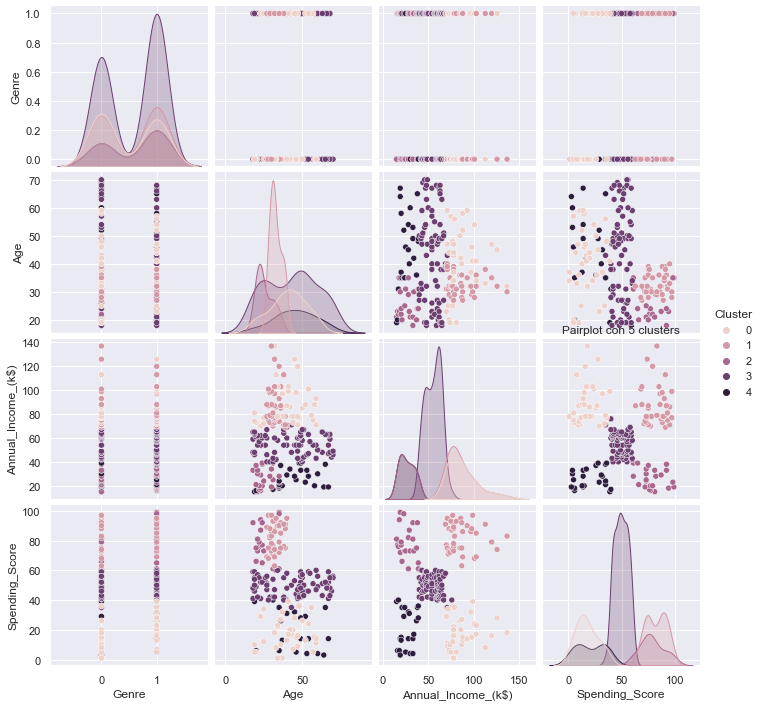

Datos Cluster 0
Valor de edad promedio: 40.666666666666664
Valor de ingreso anual promedio: 87.75
Valor de gasto promedio: 17.583333333333332
Cantidad de hombres: 19
Cantidad de mujeres: 17

Datos Cluster 1
Valor de edad promedio: 32.69230769230769
Valor de ingreso anual promedio: 86.53846153846153
Valor de gasto promedio: 82.12820512820512
Cantidad de hombres: 18
Cantidad de mujeres: 21

Datos Cluster 2
Valor de edad promedio: 25.52173913043478
Valor de ingreso anual promedio: 26.304347826086957
Valor de gasto promedio: 78.56521739130434
Cantidad de hombres: 9
Cantidad de mujeres: 14

Datos Cluster 3
Valor de edad promedio: 43.08860759493671
Valor de ingreso anual promedio: 55.29113924050633
Valor de gasto promedio: 49.56962025316456
Cantidad de hombres: 33
Cantidad de mujeres: 46

Datos Cluster 4
Valor de edad promedio: 45.21739130434783
Valor de ingreso anual promedio: 26.304347826086957
Valor de gasto promedio: 20.91304347826087
Cantidad de hombres: 9
Cantidad de mujeres: 14


In [12]:
#Con 5 clusters
data['Cluster'] = etiquetas5_
sns.pairplot(data, hue = 'Cluster')
plt.title('Pairplot con 5 clusters')
plt.show()

print('Datos Cluster 0')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 0].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 0].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 0].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 0) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 0) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 1')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 1].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 1].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 1].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 1) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 1) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 2')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 2].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 2].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 2].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 2) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 2) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 3')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 3].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 3].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 3].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 3) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 3) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 4')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 4].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 4].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 4].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 4) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 4) & (data['Genre'] == 1)].count())

Analizo las caracteristicas de cada cluster: 

Grupo 0: Valores con Spending_Score bajo (promedio 17,58) y alto ingreso anual (promedio 87750). Las edades de este grupo van desde los mas jovenes, alrededor de 20 años, hasta los 60, siendo la edad promedio 41 años. 
Nombre del cluster: Adultos con altos ingresos pero pocos gastos. 

Grupo 1: Valores con Spending_Score alto (promedio 82,12) y alto ingreso anual (promedio 86500).En este grupo se concentran las edades entre 25 y 40 años, la edad promedio es 33 años. Por lo que corresponde a adultos jóvenes/adultos que tienen un ingreso alto anual y que realizan una cantidad considerable de compras.
Nombre del cluster: Adultos jóvenes con altos ingresos y altos gastos. 

Grupo 2: Valores con Spending_Score alto (promedio 78,56) pero con un ingreso anual bajo (promedio 26000). Ademas en los graficos de la edad, podemos ver que este grupo se concentra en valores bajos de edad, con edad promedio de 26 años. Puede corresponder a jóvenes, mayoría mujeres, sin ingresos o sin ingresos altos que usan el dinero de sus padres para realizar compras, por eso tienen un alto score de gastos.
Nombre del cluster: Jóvenes con pocos ingresos y muchos gastos. 

Grupo 3: Valores con Spending_Score medio (promedio 49,56) e ingreso anual medio (promedio 55290). Las edades sun muy variadas, van desde los 20 hasta los 70 años, siendo la edad promedio 43 años. Este grupo esta conformado por mayoria mujeres, siendo el 58% del cluster. 
Nombre del cluster: Adultos con ingresos y gastos medios. 

Grupo 4: Valores con Spending_Score bajo (promedio 20,9) y con un ingreso anual bajo también (promedio 26300). La mayoría de las edades van desde los 30 hasta los 70, siendo la edad promedio 45 años.  
Nombre del cluster: Adultos con bajos ingresos y bajos gastos. 

En este caso, el cluster 3 del caso n_cluster = 4, se divide en dos grupos que corresponden a los número 3 y 4.
En ambos grupos la edad promedio es similar, pero hay diferencia en cuanto al spending_score y al ingreso anual, ya que en el grupo 3 estos valores son mayores que en el grupo 4. En caso de que se quiera realizar esta separación en grupos para ofrecer descuentos o enviar campañas de marketing, es útil conocer con el amyor detalle posible cuáles grupos, es más probable que realicen compras.

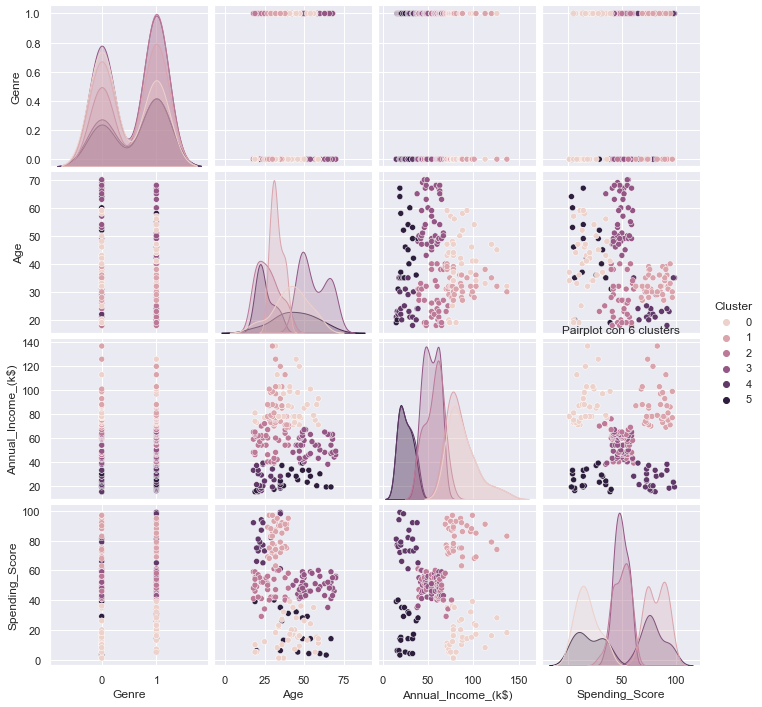

Datos Cluster 0
Valor de edad promedio: 41.68571428571428
Valor de ingreso anual promedio: 88.22857142857143
Valor de gasto promedio: 17.285714285714285
Cantidad de hombres: 20
Cantidad de mujeres: 15

Datos Cluster 1
Valor de edad promedio: 32.69230769230769
Valor de ingreso anual promedio: 86.53846153846153
Valor de gasto promedio: 82.12820512820512
Cantidad de hombres: 18
Cantidad de mujeres: 21

Datos Cluster 2
Valor de edad promedio: 27.0
Valor de ingreso anual promedio: 56.6578947368421
Valor de gasto promedio: 49.13157894736842
Cantidad de hombres: 13
Cantidad de mujeres: 25

Datos Cluster 3
Valor de edad promedio: 56.15555555555556
Valor de ingreso anual promedio: 53.37777777777778
Valor de gasto promedio: 49.08888888888889
Cantidad de hombres: 20
Cantidad de mujeres: 25

Datos Cluster 4
Valor de edad promedio: 25.272727272727273
Valor de ingreso anual promedio: 25.727272727272727
Valor de gasto promedio: 79.36363636363636
Cantidad de hombres: 9
Cantidad de mujeres: 13

Datos C

In [13]:
#Con 6 clusters
data['Cluster'] = etiquetas6_
sns.pairplot(data, hue = 'Cluster')
plt.title('Pairplot con 6 clusters')
plt.show()

print('Datos Cluster 0')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 0].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 0].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 0].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 0) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 0) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 1')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 1].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 1].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 1].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 1) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 1) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 2')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 2].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 2].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 2].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 2) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 2) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 3')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 3].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 3].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 3].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 3) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 3) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 4')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 4].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 4].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 4].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 4) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 4) & (data['Genre'] == 1)].count())

print('\nDatos Cluster 5')
print('Valor de edad promedio:', data['Age'][data['Cluster'] == 5].mean())
print('Valor de ingreso anual promedio:', data['Annual_Income_(k$)'][data['Cluster'] == 5].mean())
print('Valor de gasto promedio:', data['Spending_Score'][data['Cluster'] == 5].mean())
print('Cantidad de hombres:', data['Genre'][(data['Cluster'] == 5) & (data['Genre'] == 0)].count())
print('Cantidad de mujeres:', data['Genre'][(data['Cluster'] == 5) & (data['Genre'] == 1)].count())

Analizo las características de cada cluster: 

Grupo 0: Valores con Spending_Score bajo (promedio 17,28) y alto ingreso anual (promedio 88200). Las edades de este grupo van desde los mas jovenes, alrededor de 20 años, hasta los 60, siendo la edad promedio 42 años.
Nombre del cluster: Adultos con altos ingresos pero pocos gastos. 

Grupo 1: Valores con Spending_Score alto (promedio 82) y alto ingreso anual (promedio 86000).En este grupo se concentran las edades entre 30 y 40 años, siendo el promedio 33 años. Por lo que corresponde a adultos jóvenes/adultos que tienen un ingreso alto anual y que realizan una cantidad considerable de compras.
Nombre del cluster: Jóvenes adultos con altos ingresos y altos gastos. 

Grupo 2: Valores con Spending_Score medio (promedio 49) e ingreso anual medio (promedio 56600), las edades van desde los más jóvenes hasta los 40 años aproximadamente, siendo el promedio de 27 años. Pueden ser jovenes que comienzan a trabajar con un buen sueldo mensual. Las mujeres representan el 66% del cluster.
Nombre del cluster: Jóvenes con ingresos y gastos medios. 

Grupo 3: Valores con Spending_Score medio (promedio 49) e ingreso anual medio (promedio 56000). Las edades van a partir de los 40 años hasta los 60 años, con un promedio de 56 años. 
Nombre del cluster: Adultos con gastos e ingresos medios. 

Grupo 4: Valores con Spending_Score alto (promedio 79,36) pero con un ingreso anual bajo (promedio 25700). En este caso las edades estan concentradas en los valores más bajos, con promedio 25 años. Puede corresponder a jóvenes sin ingresos o sin ingresos altos que usan el dinero de sus padres para realizar compras, por eso tienen un alto score de gastos.
Nombre del cluster: Jóvenes con pocos ingresos y muchos gastos. 

Grupo 5: Valores con Spending_Score bajo (promedio 19,5) y con un ingreso anual bajo también (promedio 25000). La mayoría de las edades van desde los 30 hasta los 70, la edad promedio del grupo es 44 años. Las mujeres representan el 63% del cluster.
Nombre del cluster: Adultos con bajo ingreso y bajos gastos. 
 
 
La diferencia entre los 5 grupos obtenidos y los 6 es que en el segundo caso se divide el cluster numero 3 del caso con n_cluster = 5 en dos según la edad de las personas (cluster 2 y 3 de este caso n_cluster = 6), estos dos grupos tienen caracteristicas similares en cuanto a spending_score e ingreso anual pero uno de ellos esta conformado por personas con edad promedio de 27 años, y el otro por personas con edad promedio 56 años.
Dependiendo para que se quiera realizar la separacion en grupos, puede ser útil tener los grupos separados tambien por edad ya que los productos que se les pueden ofrecer van a ser diferentes.  

## Enunciado
En este ejercicio seguiréis los pasos del ciclo de vida de un proyecto de minería de datos para el caso de un algoritmo de generación de reglas de asociación. Lo haréis con el fichero *Lastfm.csv* que encontraréis adjunto. Este fichero contiene un conjunto de registros del histórico de las canciones que ha escuchado un usuario en un portal Web de música. "artist" es el nombre del grupo que ha escuchado, "sex" y "country" corresponden a variables que describen al usuario.


In [2]:
#Cargo la libreria apriori
from apyori import apriori
data_fm = pd.read_csv("lastfm.csv")
data_fm.head(20)

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
5,1,schandmaul,f,Germany
6,1,edguy,f,Germany
7,1,jack johnson,f,Germany
8,1,eluveitie,f,Germany
9,1,the killers,f,Germany


In [3]:
#Analisis de variables

#Cantidad de filas y columnas
print('El dataset contiene', data_fm.shape[0], ' filas y', data_fm.shape[1],' columnas')

#Analizo si hay valores nulos
print('\n\nInformacion del Dataset:\n ',data_fm.info())
print('\nCantidad de valores faltantes por columna:\n',data_fm.isna().sum())

#Valores unicos por columna
print('\nCantidad de usuarios:\n',len(data_fm['user'].unique()))
print('\nValores de la variable country:\n',data_fm.country.unique())

El dataset contiene 289955  filas y 4  columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289955 entries, 0 to 289954
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user     289955 non-null  int64 
 1   artist   289955 non-null  object
 2   sex      289955 non-null  object
 3   country  289955 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


Informacion del Dataset:
  None

Cantidad de valores faltantes por columna:
 user       0
artist     0
sex        0
country    0
dtype: int64

Cantidad de usuarios:
 15000

Valores de la variable country:
 ['Germany' 'United States' 'United Kingdom' 'Finland' 'Portugal' 'Italy'
 'Austria' 'Korea, Republic of' 'Sweden' 'Japan' 'Greece' 'Netherlands'
 'Iran, Islamic Republic of' 'Ukraine' 'Thailand' 'Russian Federation'
 'Australia' 'Mexico' 'Norway' 'Poland' 'Canada' 'Estonia' 'Spain'
 'Uruguay' 'Lithuania' 'Czech Republic' 'France' 'Turkey' 'Argentina'
 'S

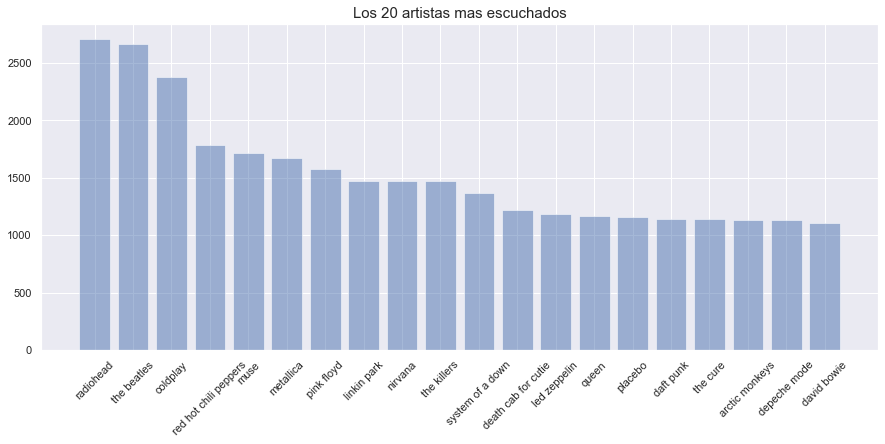

In [10]:
#Grafico un histograma de los 20 artistas más escuchados
cantidad_escuchados = data_fm['user'].groupby(data_fm['artist']).count().reset_index(name ='Cantidad de veces escuchado').sort_values('Cantidad de veces escuchado', ascending = False)

plt.figure(figsize = (15,6))
y = cantidad_escuchados['Cantidad de veces escuchado'][:20]
y_pos = np.arange(len(objects))
x = cantidad_escuchados['artist'][:20]
 
plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.xticks(rotation=45)
plt.title('Los 20 artistas mas escuchados', fontsize = 15)
plt.show()

In [17]:
#Transformo el data set a una lista de transacciones 
records = []

for i in data_fm['user'].unique():
    records.append(list(data_fm[data_fm['user'] == i]['artist'].values))


In [18]:
print(len(records))
records[:2]

15000


[['red hot chili peppers',
  'the black dahlia murder',
  'goldfrapp',
  'dropkick murphys',
  'le tigre',
  'schandmaul',
  'edguy',
  'jack johnson',
  'eluveitie',
  'the killers',
  'judas priest',
  'rob zombie',
  'john mayer',
  'the who',
  'guano apes',
  'the rolling stones'],
 ['devendra banhart',
  'boards of canada',
  'cocorosie',
  'aphex twin',
  'animal collective',
  'atmosphere',
  'joanna newsom',
  'air',
  'portishead',
  'massive attack',
  'broken social scene',
  'arcade fire',
  'plaid',
  'prefuse 73',
  'm83',
  'the flashbulb',
  'pavement',
  'goldfrapp',
  'amon tobin',
  'sage francis',
  'four tet',
  'max richter',
  'autechre',
  'radiohead',
  'neutral milk hotel',
  'beastie boys',
  'aesop rock',
  'mf doom',
  'the books']]

Genero las reglas usando el algoritmo apriori

Si lanzamos el algoritmo "apriori", generaremos directamente un set de reglas con diferente soporte, confianza y lift. 
El soporte indica cuantas veces se han encontrado las reglas {lsh => rhs} en el dataset, cuanto más alto mejor. 
La confianza habla de la probabilidad de que {rhs} se de en función de {lhs}. 
El lift es un parámetro que nos indica cuánto de aleatoriedad hay en las reglas. Un lift de 1 o menos es que las reglas son completamente fruto del azar.

In [19]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.5, min_lift=3, min_length=2)
association_results = list(association_rules)
print("Hay {} reglas de asociación.".format(len(association_results)))

Hay 38 reglas de asociación.


In [20]:
#Las reglas son las siguientes:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'radiohead', 'broken social scene'})
frozenset({'coldplay', 'keane'})
frozenset({'coldplay', 'snow patrol'})
frozenset({'coldplay', 'the fray'})
frozenset({'coldplay', 'travis'})
frozenset({'iron maiden', 'judas priest'})
frozenset({'t.i.', 'kanye west'})
frozenset({'megadeth', 'metallica'})
frozenset({'nightwish', 'sonata arctica'})
frozenset({'rihanna', 'the pussycat dolls'})
frozenset({'the beatles', 'beck', 'radiohead'})
frozenset({'coldplay', 'the killers', 'bloc party'})
frozenset({'the beatles', 'bob dylan', 'pink floyd'})
frozenset({'the beatles', 'radiohead', 'bob dylan'})
frozenset({'the beatles', 'bob dylan', 'the rolling stones'})
frozenset({'coldplay', 'death cab for cutie', 'the killers'})
frozenset({'coldplay', 'the killers', 'muse'})
frozenset({'coldplay', 'radiohead', 'oasis'})
frozenset({'coldplay', 'the beatles', 'oasis'})
frozenset({'coldplay', 'the killers', 'oasis'})
frozenset({'coldplay', 'sigur rós', 'radiohead'})
frozenset({'coldplay', 'radiohead', '

In [21]:
#Resultados finales con lift, support y confidence
results = []
for item in association_results[0:9]:
    #Primer item de la lista (primera regla)
    pair = item[0]
    items = [x for x in pair]
    valor0 = str(items[0])
    valor1 = str(items[1])
    print("Regla: Con ", valor0,  " también puedes escuchar " , valor1)

    # Segundo indice de la lista
    valor2 = str(item[1])
    print("Support: ",  valor2)

    # Tercer y cuarto item de la lista
    valor3 = str(item[2][0][2])
    valor4 = str(item[2][0][3])
    print("Confidence: " , valor3)
    print("Lift: " , valor4)
    print("=====================================")
    
    rows = (valor0,valor1,valor2,valor3,valor4)
    results.append(rows)


for item in association_results[10:]:
    #Primer item de la lista (primera regla)
    pair = item[0]
    items = [x for x in pair]
    valor0 = str(items[0])
    valor1 = str(items[1])
    valor5 = str(items[2])
    print("Regla: Con ", valor0, "y con", valor1,  " también puedes escuchar " , valor5)

    # Segundo indice de la lista
    valor2 = str(item[1])
    print("Support: ",  valor2)

    # Tercer y cuarto item de la lista
    valor3 = str(item[2][0][2])
    valor4 = str(item[2][0][3])
    print("Confidence: " , valor3)
    print("Lift: " , valor4)
    print("=====================================")
    
    rows = (valor0,valor1,valor2,valor3,valor4)
    results.append(rows)

#Lo convierto en un dataframe para que sea mas facil manejarlo
labels = ['Artist 1', 'Artist 2', 'Support', 'Confidence', 'Lift']
data_results = pd.DataFrame.from_records(results, columns = labels)

Regla: Con  radiohead  también puedes escuchar  broken social scene
Support:  0.015066666666666667
Confidence:  0.5472154963680388
Lift:  3.0355889221599788
Regla: Con  coldplay  también puedes escuchar  keane
Support:  0.022266666666666667
Confidence:  0.6374045801526719
Lift:  4.020634441669503
Regla: Con  coldplay  también puedes escuchar  snow patrol
Support:  0.026466666666666666
Confidence:  0.5251322751322751
Lift:  3.312440759875579
Regla: Con  coldplay  también puedes escuchar  the fray
Support:  0.011266666666666666
Confidence:  0.5168195718654434
Lift:  3.2600057098324853
Regla: Con  coldplay  también puedes escuchar  travis
Support:  0.013733333333333334
Confidence:  0.5628415300546448
Lift:  3.5503040163245045
Regla: Con  iron maiden  también puedes escuchar  judas priest
Support:  0.013533333333333333
Confidence:  0.5075
Lift:  8.56299212598425
Regla: Con  t.i.  también puedes escuchar  kanye west
Support:  0.0104
Confidence:  0.5672727272727273
Lift:  8.854413016743923
R

In [22]:
data_results.head()

,Artist 1,Artist 2,Support,Confidence,Lift
0,radiohead,broken social scene,0.015066666666666667,0.5472154963680388,3.0355889221599788
1,coldplay,keane,0.022266666666666667,0.6374045801526719,4.020634441669503
2,coldplay,snow patrol,0.026466666666666666,0.5251322751322751,3.312440759875579
3,coldplay,the fray,0.011266666666666666,0.5168195718654434,3.2600057098324853
4,coldplay,travis,0.013733333333333334,0.5628415300546448,3.5503040163245045


In [23]:
#Ordeno las reglas de asociacion por Support
data_results.sort_values(by='Support', ascending=False).head(10)

,Artist 1,Artist 2,Support,Confidence,Lift
2,coldplay,snow patrol,0.026466666666666666,0.5251322751322751,3.312440759875579
1,coldplay,keane,0.022266666666666667,0.6374045801526719,4.020634441669503
7,megadeth,metallica,0.016266666666666665,0.5281385281385281,4.743759234777198
15,coldplay,the killers,0.015133333333333334,0.5089686098654709,3.2104832413717674
21,coldplay,radiohead,0.015066666666666667,0.5243619489559165,3.307581679705108
0,radiohead,broken social scene,0.015066666666666667,0.5472154963680388,3.0355889221599788
12,the beatles,radiohead,0.013866666666666666,0.5730027548209367,3.2215297310022675
4,coldplay,travis,0.013733333333333334,0.5628415300546448,3.5503040163245045
31,placebo,muse,0.013666666666666667,0.5137844611528822,4.504247175507443
5,iron maiden,judas priest,0.013533333333333333,0.5075,8.56299212598425


Ordenando por support vemos que:

    *La relacion más frecuente es ColdPlay -> Snow Patrol, esta relacion se da en un 26% de los usuarios. 
    
    *Con un lift de 3 y una confianza del 52,5%, podemos decir que las personas que escuchan Coldplay tambien escuchan Snow Patrol.
    El lift 2 se refiere a que la probabilidad de que la gente escuche al artista Coldplay y al artista Snow Patrol es dos veces mas que la probabilidad de que escuchen solo al primero. 
    
    *Con un lift de 4 y una confianza del 63,7% podemos decir que las personas que escuchan Coldplay tambien escuchan Keane. En este caso la probabilidad de que el mismo usuario escuche a los dos artistas es 4 veces mas que la probabilidad de solo escuchar al primero.
    
    *Con un lift de 4,74 y una confianza del 52,8% podemos decir que las personas que escuchan Metallica, tambien escuchan Megadeth. Siendo casi 5 veces mas probable que el mismo usuario escuche ambos artistas a que escuche solo al primero.


In [24]:
#Ordeno las reglas de asociacion por Confidence
data_results.sort_values(by='Confidence', ascending=False).head(10)

,Artist 1,Artist 2,Support,Confidence,Lift
18,coldplay,the killers,0.011133333333333334,0.6626984126984128,4.1801834274500385
32,the beatles,sigur rós,0.010466666666666668,0.6434426229508198,3.5693932486177133
1,coldplay,keane,0.022266666666666667,0.6374045801526719,4.020634441669503
20,coldplay,radiohead,0.010066666666666666,0.634453781512605,4.002021329978585
22,coldplay,the smashing pumpkins,0.010933333333333333,0.628352490421456,3.4856831939060062
35,the beatles,the smashing pumpkins,0.011466666666666667,0.6209386281588448,3.444555999401876
11,the beatles,bob dylan,0.010333333333333333,0.6150793650793651,3.4580923823802387
29,led zeppelin,the doors,0.010666666666666666,0.5970149253731343,5.689468793263668
25,coldplay,the killers,0.0104,0.5954198473282443,3.7558022329367806
13,the beatles,bob dylan,0.011466666666666667,0.5910652920962199,3.3230807276773984


Ordenando por confianza vemos que:

    *De los usuarios que escuchan The Killers, hay un 66% que también escucha Coldplay. 
    
    *De  los usuarios que escuchan Radiohead, hay un 64% que también escucha The Beatles.
    
    *De los usuarios que escuchen Coldplay, hay un 63,7% que también escucha Keane.

    *De los usuarios que escuchan Snow Patrol, hay un 63% que también escucha Coldplay
    
    *De los usuarios que escuchan The Smashing Pumpkins, un 62% también escucha Radiohead.
    

## Enunciado
Busca información sobre otros métodos de agregación diferentes al *k-means*. Probar el funcionamiento de al menos 2 métodos diferentes y comparar los resultados obtenidos.

In [25]:
#Vuelvo a cargar el dataset
data = pd.read_csv("clientes.csv")
data = data.drop(['CustomerID'], axis = 1)
data.Genre = data.Genre.map({'Female': 1, 'Male': 0})
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Uso el metodo Mini Batch Kmeans, este metodo es una variante del algoritmo KMeans.
Utiliza mini-lotes (mini batchs), que son subconjuntos de los datos de entrada muestreados aleatoriamente en cada iteración de entrenamiento, de esta forma se reduce la cantidad de cálculos necesarios para converger a una solución local. Es decir, el paso más costoso desde el punto de vista computacional se realiza sólo en una muestra aleatoria de observaciones en contraposición a todas las observaciones, como hace el metodo Kmeans. Este enfoque puede reducir significativamente el tiempo requerido para que el algoritmo encuentre convergencia (es decir, ajuste los datos) con sólo un pequeño costo en calidad.
MiniBatchKMeans converge más rápido que KMeans, pero la calidad de los resultados se reduce.

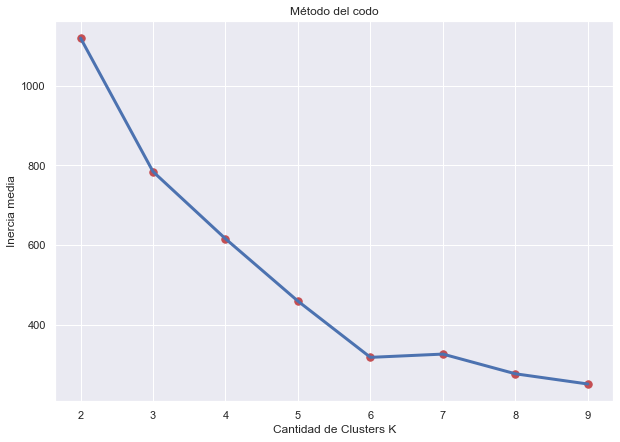

In [26]:
from sklearn.cluster import MiniBatchKMeans

lista_distancias_medias = []
# Entreno un modelo para cada numero de cluster que quiero probar
K = np.arange(2,10)
for k in K:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k,
                        random_state=42,
                        batch_size=6)
    minibatch_kmeans = minibatch_kmeans.fit(data)
    #Inertia me da la suma de las distancias para todas las instancias del dataset
    distancia_total = minibatch_kmeans.inertia_
    # Calculo la distancia media y la agrego a la lista
    distancia_media = distancia_total/len(data)
    lista_distancias_medias.append(distancia_media)

#Grafico 
plt.figure(figsize = (10,7))
plt.plot(K,lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')
plt.show()

Obtengo un resultado similar al que obtuve con Kmeans, siendo los valores óptimos para el numeros de clusters 4 o 5. 

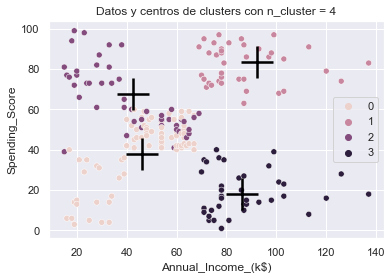

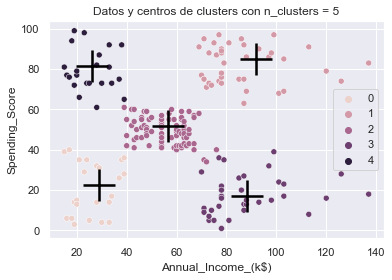

In [27]:
#Grafico dos variables para ver como agrupo los datos

#Pruebo con el valor 4 
minibatch_kmeans = MiniBatchKMeans(n_clusters=4,
                        random_state=0,
                        batch_size=6)

minibatch_kmeans = minibatch_kmeans.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas4_ = minibatch_kmeans.labels_
centros_ = minibatch_kmeans.cluster_centers_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], hue = etiquetas4_)
sns.scatterplot(x = centros_[:, 2],y = centros_[:, 3],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_cluster = 4')
plt.show()

#Pruebo con el valor 5
minibatch_kmeans = MiniBatchKMeans(n_clusters=5,
                        random_state=0,
                        batch_size=6)

minibatch_kmeans = minibatch_kmeans.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas5_ = minibatch_kmeans.labels_
centros_ = minibatch_kmeans.cluster_centers_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], hue = etiquetas5_)
sns.scatterplot(x = centros_[:, 2],y = centros_[:, 3],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 5')
plt.show()

Comparado con el modelo Kmeans, eligiendo 4 centros los cluster se mezclan más en este caso, es decir que la calidad es menor. Pero eligiendo 5 cluster, ambos modelos los agrupan muy parecido. 
Considero que el valor óptimo de clusters sería 5 ya que estan mejor definidos. 

Como segundo modelo, selecciono Agglomerative Clustering. 
En este método, al inicio, cada punto o dato está en un clúster separado. A cada paso, los dos clústers más cercanos se fusionan. Estas fusiones de clústers se siguen produciendo de forma sucesiva produciendo una jerarquía de resultados de clustering. Al final del proceso solo queda un único clúster que aglutina todos los elementos.

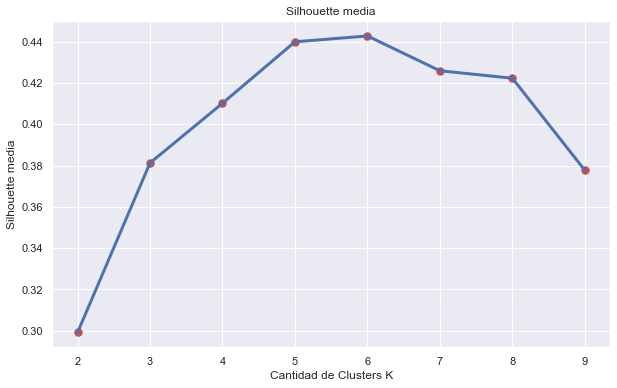

In [28]:
from sklearn.cluster import AgglomerativeClustering

lista_sil = []
K = np.arange(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(data)
    # Tomamos las etiquetas
    etiquetas = model.labels_
    
    # Calculamos el coeficiente silhouette 
    valor_medio_sil = silhouette_score(data, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,6))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media')
plt.show()

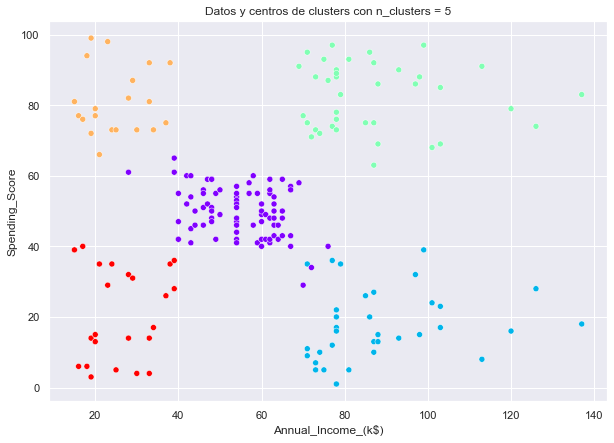

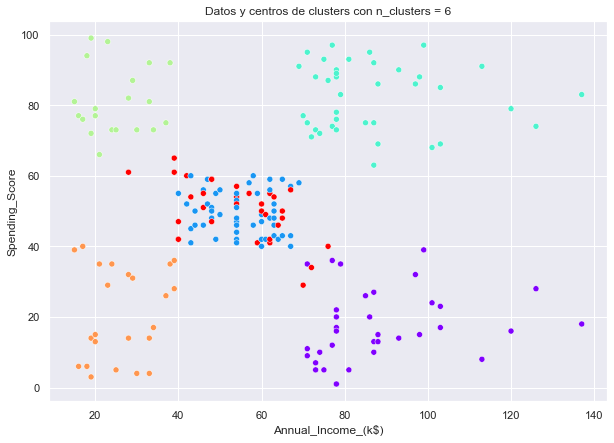

In [29]:
#Observando el gráfico, el numero de cluster que hace que el coeficiente sea lo más cercano a uno es 5 o 6.
#El grafico es muy similar al obtenido con Kmeans, que tambien me habia dado estos dos valores como los mejores. 

#Pruebo con el valor 5 
model = AgglomerativeClustering(n_clusters = 5)
model.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas = model.labels_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
plt.figure(figsize=(10, 7))
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], c=model.labels_, cmap='rainbow')
plt.title('Datos y centros de clusters con n_clusters = 5')
plt.show()


#Pruebo con el valor 6
model = AgglomerativeClustering(n_clusters = 6)
model.fit(data)

# Obtengo la posición de los centros y las etiquetas
etiquetas = model.labels_

# Grafico con dos variables: Annual_Income_(k$) y Spending_Score'
plt.figure(figsize=(10, 7))
sns.scatterplot(x = data.iloc[:, 2],y = data.iloc[:, 3], c=model.labels_, cmap='rainbow')
plt.title('Datos y centros de clusters con n_clusters = 6')
plt.show()


En este caso los resultados obtenidos son tambien muy similares a los que obtuve con el método Kmeans. 
Considero que ambos casos son buenos, pero si se quiere tener mas detalle de la edad de las personas, lo ideal sería seleccionar 6 clusters. 